In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Now your Google Drive is accessible at '/content/drive/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from distutils.dir_util import copy_tree, remove_tree
from PIL import Image
from random import randint
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef as MCC
from sklearn.metrics import balanced_accuracy_score as BAS
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, MaxPool2D

In [4]:
!pip install tensorflow==2.12
!pip install keras==2.12
!pip install tensorflow-addons==0.19

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 112.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-addons
    Found existing installation: tensorflow-addons 0.23.0
    Uninstalling tensorflow-addons-0.23.0:
      Successfully uninstalled tensorflow-addons-0.23.0


In [1]:
import tensorflow_addons as tfa

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
tf.config.list_physical_devices()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12075643504008120922
xla_global_id: -1
]


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lukechugh/best-alzheimer-mri-dataset-99-accuracy")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/lukechugh/best-alzheimer-mri-dataset-99-accuracy/versions/1


In [6]:
!kaggle datasets list


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [7]:
!kaggle datasets download -d lukechugh/best-alzheimer-mri-dataset-99-accuracy


Dataset URL: https://www.kaggle.com/datasets/lukechugh/best-alzheimer-mri-dataset-99-accuracy
License(s): ODbL-1.0
best-alzheimer-mri-dataset-99-accuracy.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
import zipfile
import os

# Define the dataset file name and extraction directory
dataset_zip = "best-alzheimer-mri-dataset-99-accuracy.zip"
extract_dir = "alzheimer_dataset"

# Unzip the dataset
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Dataset extracted to {extract_dir}")


Dataset extracted to alzheimer_dataset


In [9]:
import os
os.listdir("alzheimer_dataset")

['Combined Dataset']

In [10]:
import os
import pandas as pd

# Define the dataset directory
dataset_dir = "alzheimer_dataset/Combined Dataset"

# Initialize empty lists to store image data
image_paths = []
labels = []

# Iterate through the dataset directory structure
for split in ["test", "train"]:
    split_dir = os.path.join(dataset_dir, split)
    for label in os.listdir(split_dir):
        label_dir = os.path.join(split_dir, label)
        for image_file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_file)
            image_paths.append(image_path)
            labels.append(label)

# Create a Pandas DataFrame
df = pd.DataFrame({"image_path": image_paths, "label": labels})

# Display the DataFrame
print(df.head())

                                          image_path                label
0  alzheimer_dataset/Combined Dataset/test/Modera...  Moderate Impairment
1  alzheimer_dataset/Combined Dataset/test/Modera...  Moderate Impairment
2  alzheimer_dataset/Combined Dataset/test/Modera...  Moderate Impairment
3  alzheimer_dataset/Combined Dataset/test/Modera...  Moderate Impairment
4  alzheimer_dataset/Combined Dataset/test/Modera...  Moderate Impairment


In [11]:
default_dir = "C:/Users/mdaff/Downloads/project/AlzheimerDataset/"
root_dir = "C:/Users/mdaff/Downloads/project/"
test_dir = default_dir + "test/"
train_dir = default_dir + "train/"
work_dir = root_dir + "dataset/"

if os.path.exists(work_dir):
    remove_tree(work_dir)


os.mkdir(work_dir)
copy_tree(train_dir, work_dir)
copy_tree(test_dir, work_dir)
print("Working Directory Contents:", os.listdir(work_dir))

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/hrith/Downloads/project/dataset/'

In [ ]:
WORK_DIR = 'C:/Users/mdaff/Downloads/project/dataset/'

CLASSES = [ 'NonDemented',
            'VeryMildDemented',
            'MildDemented',
            'ModerateDemented']

IMG_SIZE = 176
IMAGE_SIZE = [176, 176]
DIM = (IMG_SIZE, IMG_SIZE)

In [ ]:
ZOOM = [.99, 1.01]
BRIGHT_RANGE = [0.8, 1.2]
HORZ_FLIP = True
FILL_MODE = "constant"
DATA_FORMAT = "channels_last"

work_dr = IDG(rescale = 1./255, brightness_range=BRIGHT_RANGE, zoom_range=ZOOM, data_format=DATA_FORMAT, fill_mode=FILL_MODE, horizontal_flip=HORZ_FLIP)

train_data_gen = work_dr.flow_from_directory(directory=WORK_DIR, target_size=DIM, batch_size=6500, shuffle=False)

Found 6400 images belonging to 4 classes.


In [12]:
import os
print(os.listdir('/content/alzheimer_dataset/Combined Dataset/test/Mild Impairment'))  # Adjust path

['15 (27).jpg', '7 (26).jpg', '16 (14).jpg', '11 (26).jpg', '8.jpg', '11 (22).jpg', '12 (3).jpg', '2 (4).jpg', '20.jpg', '1 (15).jpg', '26 (15).jpg', '8 (9).jpg', '23 (9).jpg', '24 (19).jpg', '32 (11).jpg', '7 (2).jpg', '4 (26).jpg', '3 (5).jpg', '23 (24).jpg', '8 (18).jpg', '11 (10).jpg', '26 (21).jpg', '8 (13).jpg', '26 (24).jpg', '21 (16).jpg', '31 (8).jpg', '30 (22).jpg', '1 (11).jpg', '20 (23).jpg', '24 (8).jpg', '19 (27).jpg', '21 (27).jpg', '31.jpg', '16 (28).jpg', '19 (13).jpg', '9 (11).jpg', '8 (21).jpg', '21 (19).jpg', '23 (20).jpg', '20 (24).jpg', '11 (28).jpg', '2 (24).jpg', '15 (14).jpg', '31 (14).jpg', '25 (8).jpg', '6 (3).jpg', '2 (25).jpg', '27 (7).jpg', '31 (28).jpg', '21 (18).jpg', '19 (15).jpg', '13 (22).jpg', '15 (4).jpg', '22 (14).jpg', '25 (24).jpg', '32 (6).jpg', '31 (9).jpg', '12 (11).jpg', '7 (12).jpg', '20 (8).jpg', '9 (16).jpg', '16 (22).jpg', '8 (3).jpg', '9 (2).jpg', '22 (28).jpg', '19 (14).jpg', '23 (3).jpg', '16 (19).jpg', '24 (10).jpg', '23 (14).jpg', '6

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG

# Define the dataset directory (adjust this to your actual path in Colab)
# Point to the "combined dataset" folder
WORK_DIR = '/content/alzheimer_dataset/Combined Dataset/train'


CLASSES = ['Mild Impairment','Moderate Impairment','No Impairment','Very Mild Impairment']

# ... (rest of the code remains the same)
IMG_SIZE = 176
IMAGE_SIZE = [176, 176]
DIM = (IMG_SIZE, IMG_SIZE)
ZOOM = [.99, 1.01]
BRIGHT_RANGE = [0.8, 1.2]
HORZ_FLIP = True
FILL_MODE = "constant"
DATA_FORMAT = "channels_last"

# ImageDataGenerator setup
work_dr = IDG(rescale=1./255,
              brightness_range=BRIGHT_RANGE,
              zoom_range=ZOOM,
              data_format=DATA_FORMAT,
              fill_mode=FILL_MODE,
              horizontal_flip=HORZ_FLIP)

# Data generation
train_data_gen = work_dr.flow_from_directory(directory=WORK_DIR,
                                             target_size=DIM,
                                             batch_size=6500,
                                             shuffle=False,
                                             classes=CLASSES)

Found 10240 images belonging to 4 classes.


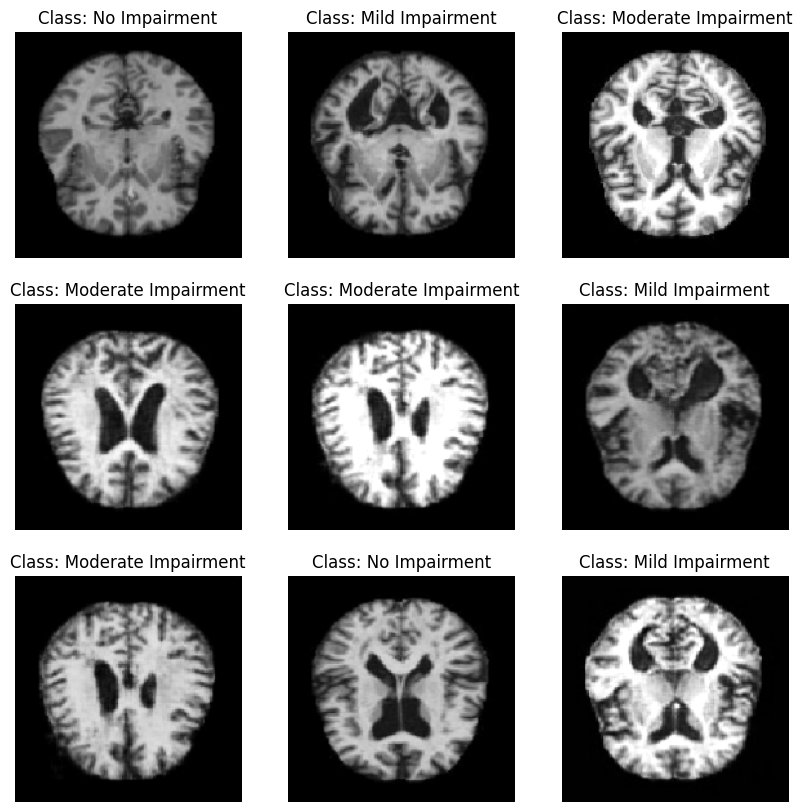

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint

def show_images(generator, y_pred=None):
    """
    Displays a grid of images from the data generator.

    Args:
        generator: The data generator.
        y_pred: Optional array of predicted labels.
                If provided, it will display actual vs. predicted labels.
    """

    labels = dict(zip([0, 1, 2, 3], CLASSES))  # Assuming you have CLASSES defined earlier

    # Get a batch of images and labels
    x, y = next(generator)

    plt.figure(figsize=(10, 10))

    if y_pred is None:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            idx = randint(0, x.shape[0] - 1)  # Get a random index within the batch
            plt.imshow(x[idx])
            plt.axis("off")
            plt.title("Class: {}".format(labels[np.argmax(y[idx])]))
    else:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(x[i])
            plt.axis("off")
            plt.title("Actual: {} \nPredicted: {}".format(labels[np.argmax(y[i])], labels[y_pred[i]]))

    plt.show()  # Add plt.show() to display the plot

# Call the function to display images
show_images(train_data_gen)

In [15]:
train_data, train_labels = next(train_data_gen)

In [16]:
print(train_data.shape, train_labels.shape)

(3740, 176, 176, 3) (3740, 4)


In [17]:
sm = SMOTE(random_state=42)

train_data, train_labels = sm.fit_resample(train_data.reshape(-1, IMG_SIZE * IMG_SIZE * 3), train_labels)

train_data = train_data.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

print(train_data.shape, train_labels.shape)

(5120, 176, 176, 3) (5120, 1)


In [18]:
train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)

In [19]:
def conv_block(filters, act='relu'):

    block = Sequential()
    block.add(Conv2D(filters, 3, activation=act, padding='same'))
    block.add(Conv2D(filters, 3, activation=act, padding='same'))
    block.add(BatchNormalization())
    block.add(MaxPool2D())

    return block

In [20]:
def dense_block(units, dropout_rate, act='relu'):

    block = Sequential()
    block.add(Dense(units, activation=act))
    block.add(BatchNormalization())
    block.add(Dropout(dropout_rate))

    return block

In [21]:
def construct_model(act='relu'):

    model = Sequential([
        Input(shape=(*IMAGE_SIZE, 3)),
        Conv2D(16, 3, activation=act, padding='same'),
        Conv2D(16, 3, activation=act, padding='same'),
        MaxPool2D(),
        conv_block(32),
        conv_block(64),
        conv_block(128),
        Dropout(0.2),
        conv_block(256),
        Dropout(0.2),
        Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        Dense(4, activation='softmax')
    ], name = "cnn_model")

    return model

In [26]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical # Import to_categorical


# ... (your conv_block, dense_block, and construct_model functions remain unchanged) ...

# Assuming train_labels and val_labels are currently in integer format
num_classes = 4  # Number of classes in your dataset

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, num_classes=num_classes)
val_labels = to_categorical(val_labels, num_classes=num_classes)


# Define metrics
METRICS = [
    tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
    tf.keras.metrics.AUC(name='auc'),
    tfa.metrics.F1Score(num_classes=4, average='macro')
]

# Define callbacks - using EarlyStopping as an example
CALLBACKS = [EarlyStopping(monitor='val_loss', patience=3)]

# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=METRICS
)

# Print model summary
model.summary()

# ... (rest of your code, including the model.fit call) ...

Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 176, 176, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 88, 16)       0         
 )                                                               
                                                                 
 sequential (Sequential)     (None, 44, 44, 32)        14016     
                                                                 
 sequential_1 (Sequential)   (None, 22, 22, 64)        55680     
                                                                 
 sequential_2 (Sequential)   (None, 11, 11, 128)       221952    
                                                         

In [29]:
EPOCHS = 50

history = model.fit(train_data, train_labels, validation_data=(val_data, val_labels), callbacks=CALLBACKS, epochs=EPOCHS)

Epoch 1/50
  6/103 [>.............................] - ETA: 7:25 - loss: 0.5703 - accuracy: 0.7344 - auc: 0.9445 - f1_score: 0.3672

KeyboardInterrupt: 

KeyError: 'acc'

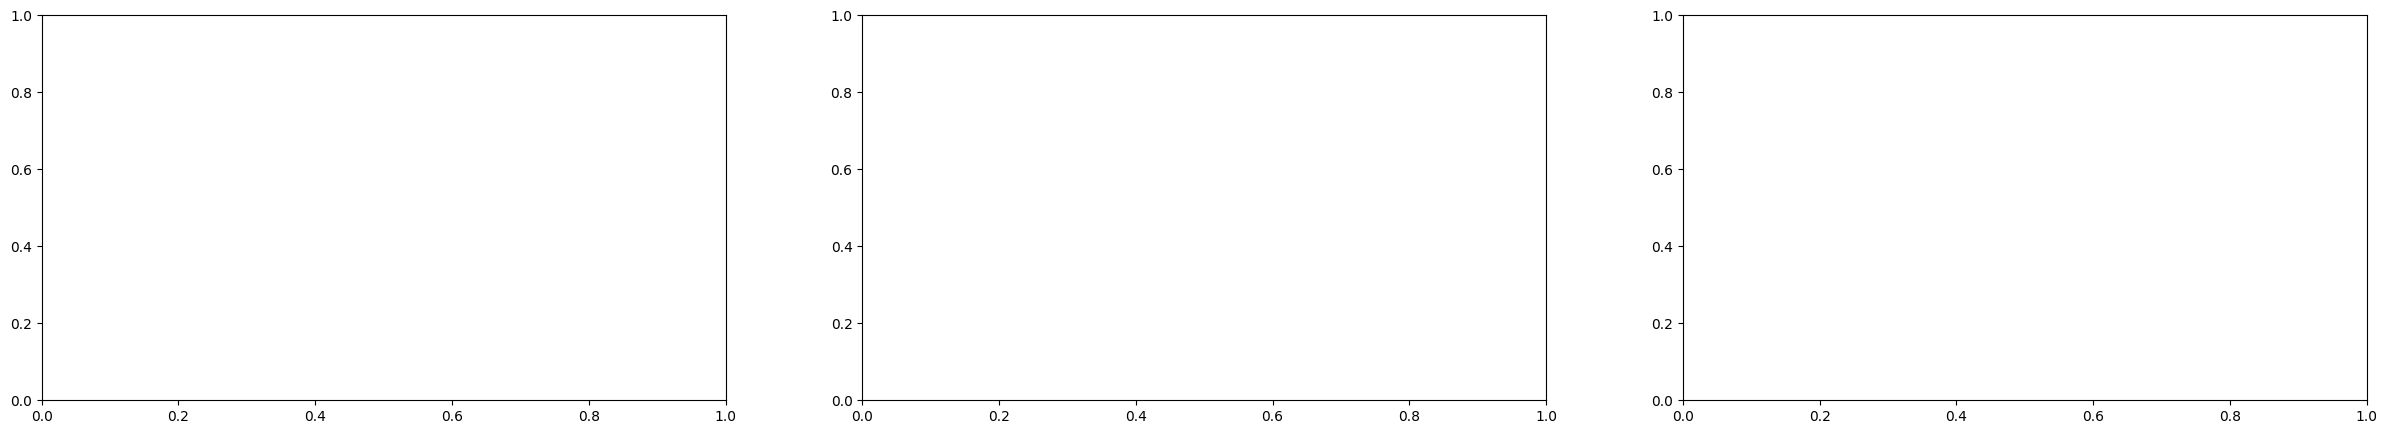

In [28]:
fig, ax = plt.subplots(1, 3, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["acc", "auc", "loss"]):
    ax[i].plot(history.history[metric],color="r")
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

In [ ]:
test_scores = model.evaluate(test_data, test_labels)

print("Test Accuracy: %.2f%%"%(test_scores[1] * 100))

80/80 [==============================] - 35s 438ms/step - loss: 0.1987 - acc: 0.9359 - auc: 0.9926 - f1_score: 0.9354
Test Accuracy: 93.59%


In [ ]:
pred_labels = model.predict(test_data)

In [ ]:
def roundoff(arr):

    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in pred_labels:
    labels = roundoff(labels)

print(classification_report(test_labels, pred_labels, target_names=CLASSES))

                  precision    recall  f1-score   support

     NonDemented       0.93      1.00      0.96       639
VeryMildDemented       1.00      1.00      1.00       635
    MildDemented       0.91      0.88      0.90       662
ModerateDemented       0.91      0.86      0.89       624

       micro avg       0.94      0.94      0.94      2560
       macro avg       0.94      0.94      0.94      2560
    weighted avg       0.94      0.94      0.94      2560
     samples avg       0.94      0.94      0.94      2560



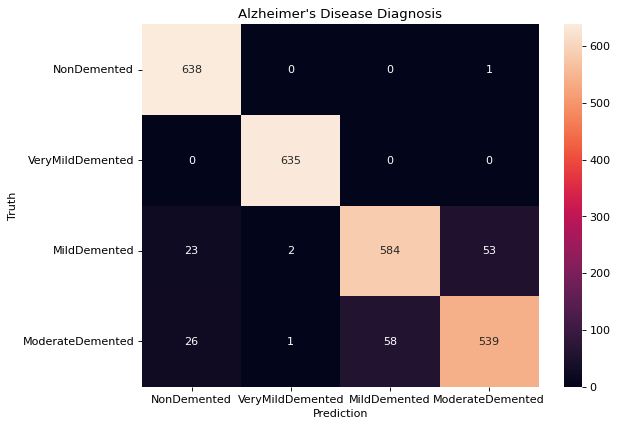

In [ ]:
pred_ls = np.argmax(pred_labels, axis=1)
test_ls = np.argmax(test_labels, axis=1)

conf_arr = confusion_matrix(test_ls, pred_ls)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(conf_arr, annot=True, fmt='d', xticklabels=CLASSES, yticklabels=CLASSES)

plt.title('Alzheimer\'s Disease Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)

In [ ]:
print("Balanced Accuracy Score: {} %".format(round(BAS(test_ls, pred_ls) * 100, 2)))
print("MCC: {} %".format(round(MCC(test_ls, pred_ls) * 100, 2)))

Balanced Accuracy Score: 93.61 %
MCC: 91.49 %


In [ ]:
model_dir = work_dir + "alzheimer_cnn_model"
model.save(model_dir, save_format='h5')
os.listdir(work_dir)

NameError: name 'work_dir' is not defined